In [7]:
import pandas as pd

file_path = 'telecom_churn.csv'
telecom_data = pd.read_csv(file_path)

print(telecom_data.head())

from sklearn.preprocessing import StandardScaler

features = ['MonthlyCharge', 'CustServCalls', 'DataUsage', 'DayMins']

scaler = StandardScaler()

X = scaler.fit_transform(telecom_data[features])


   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  


K-means Clustering

In [8]:
from sklearn.cluster import KMeans

#KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
telecom_data['Segment'] = kmeans.fit_predict(X)


Analyze Churn Rates within Each Segment


         Not Churned   Churned
Segment                       
0           0.881180  0.118820
1           0.792103  0.207897
2           0.909308  0.090692


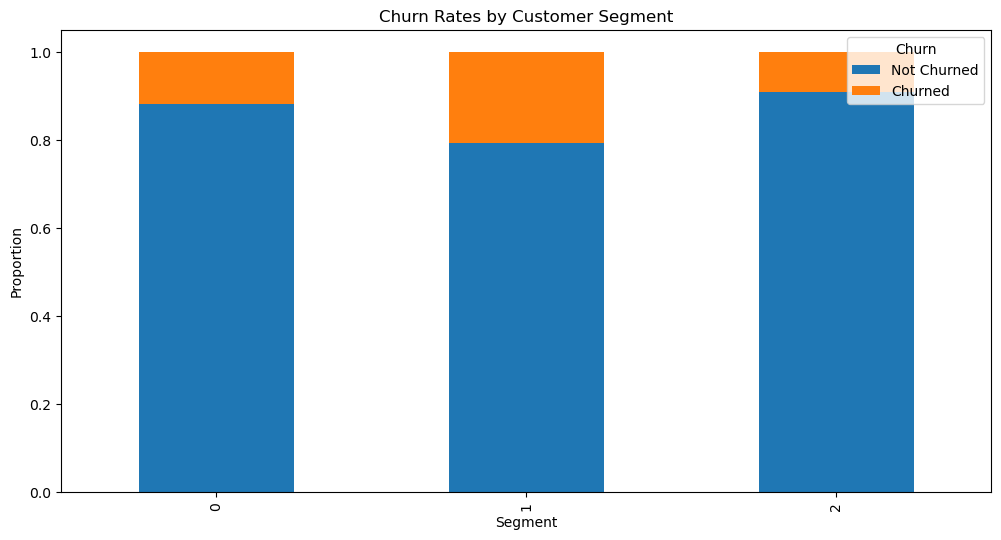

In [9]:
import matplotlib.pyplot as plt

# Analyze churn rates
segment_churn = telecom_data.groupby('Segment')['Churn'].value_counts(normalize=True).unstack().fillna(0)
segment_churn.columns = ['Not Churned', 'Churned']

print(segment_churn)

segment_churn.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn Rates by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [10]:

segment_summary = telecom_data.groupby('Segment')[features].mean()
print(segment_summary)


         MonthlyCharge  CustServCalls  DataUsage     DayMins
Segment                                                     
0            41.473046       1.641946   0.149298  134.395215
1            56.562853       1.491539   0.093191  222.356567
2            78.118616       1.550119   2.885967  184.623270


In [12]:
segment_names = {0: 'Moderate Users', 1: 'High Value/High Interaction Users', 2: 'Low Value/Low Interaction Users'}
telecom_data['Segment'] = telecom_data['Segment'].map(segment_names)

segment_moderate_users = telecom_data[telecom_data['Segment'] == 'Moderate Users']
segment_high_value_users = telecom_data[telecom_data['Segment'] == 'High Value/High Interaction Users']
segment_low_value_users = telecom_data[telecom_data['Segment'] == 'Low Value/Low Interaction Users']


segment_moderate_users.to_csv('telecom_segment_moderate_users.csv', index=False)
segment_high_value_users.to_csv('telecom_segment_high_value_users.csv', index=False)
segment_low_value_users.to_csv('telecom_segment_low_value_users.csv', index=False)

print(f'Moderate Users segment shape: {segment_moderate_users.shape}')
print(f'High Value/High Interaction Users segment shape: {segment_high_value_users.shape}')
print(f'Low Value/Low Interaction Users segment shape: {segment_low_value_users.shape}')

Moderate Users segment shape: (1254, 12)
High Value/High Interaction Users segment shape: (1241, 12)
Low Value/Low Interaction Users segment shape: (838, 12)
